In [2]:
!pip install -r requirements.txt

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
annotation = pd.read_csv('/Users/linhvien/Documents/iod/capstone/annotations_LOOK.csv')
yolo_annotation = pd.read_csv('/Users/linhvien/Documents/iod/capstone/annotations_LOOK.csv')

In [13]:
annotation.describe()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,label
count,56934.000000,56934.000000,56934.000000,56934.000000,56934.000000
mean,456.543335,208.491816,530.439204,391.994548,0.160923
std,337.590952,136.504199,325.261198,134.032079,0.367463
min,-142.840000,-114.810000,14.440000,155.070000,0.000000
25%,209.312500,130.562500,274.612500,285.030000,0.000000
50%,416.920000,157.525000,497.980000,346.970000,0.000000
75%,611.720000,195.570000,675.270000,487.167500,0.000000
max,1583.520000,785.810000,1713.440000,1078.670000,1.000000


In [481]:
dataset_location = '/Users/linhvien/Downloads/LOOK_dataset/'
new_loc = '/Users/linhvien/Documents/DATA/look'
annotation_loc = '/Users/linhvien/Documents/DATA/look/annotations'

In [15]:
i = np.random.randint(0,56934)
filename = dataset_location+annotation.filename[i]
img = Image.open(filename)
fix, ax = plt.subplots(figsize=(20, 40))
ax.imshow(img)
print(annotation.label[i])
print(w/l)
x_frame = annotation.bbox_x1[i]
y_frame = annotation.bbox_y1[i]*0.9
w_frame = annotation.bbox_x2[i] - annotation.bbox_x1[i]
h_frame = annotation.bbox_y2[i] - annotation.bbox_y1[i]*0.9
rectangle = patches.Rectangle((x_frame, y_frame), w_frame,h_frame, 
                              linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rectangle)
plt.show()


NameError: name 'dataset_location' is not defined

https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

In [16]:

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
pyplot.rcParams["figure.figsize"] = (20,40)
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        if (x-width/2>x_frame)&(x+width/2<annotation.bbox_x2[i]):
            # create the shape
            rect = Rectangle((x, y), width, height, fill=False, color='green')
            # draw the box
            ax.add_patch(rect)
            print('found')
        else:
            # create the shape
            rect = Rectangle((x, y), width, height, fill=False, color='red')
            # draw the box
            ax.add_patch(rect)
    # show the plot
    pyplot.show()

# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)


ModuleNotFoundError: No module named 'mtcnn'

Media pipe

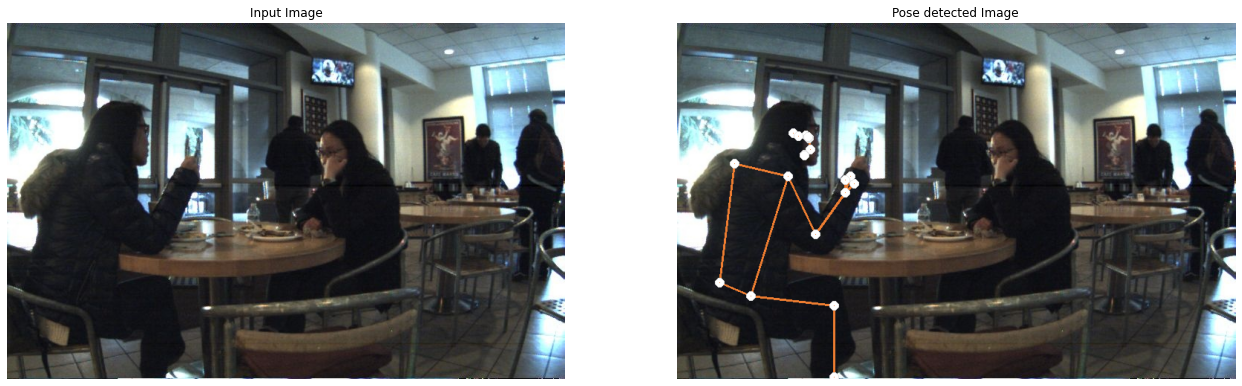

In [244]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3)

# Setup the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils
def detectPose(image_pose, pose, draw=False, display=False):
    
    original_image = image_pose.copy()
    
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    
    resultant = pose.process(image_in_RGB)

    if resultant.pose_landmarks and draw:    

        mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=2, circle_radius=2))

    if display:

            plt.figure(figsize=[22,22])
            plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
            plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

    else:

        return original_image, results
# Here we will read our image from the specified path to detect the pose

output = cv2.imread(filename)
detectPose(output, pose_image, draw=True, display=True)

In [8]:
yolo_annotation["new_filename"] = yolo_annotation.filename.apply(lambda x: x.replace("/","_",-1))

In [17]:
yolo_annotation

,filename,bbox_x1,bbox_y1,bbox_x2,bbox_y2,split,label,new_filename
0,LOOK/Nuscenes/Nuscenes_test_set/n010-2018-09-0...,416.05,450.05,440.89,518.60,test,0,LOOK_Nuscenes_Nuscenes_test_set_n010-2018-09-0...
1,LOOK/Nuscenes/Nuscenes_test_set/n016-2018-07-0...,1212.82,523.39,1254.62,639.90,test,1,LOOK_Nuscenes_Nuscenes_test_set_n016-2018-07-0...
2,LOOK/Nuscenes/Nuscenes_test_set/n016-2018-07-0...,1132.55,542.09,1178.75,656.60,test,0,LOOK_Nuscenes_Nuscenes_test_set_n016-2018-07-0...
3,LOOK/Nuscenes/Nuscenes_test_set/n016-2018-07-0...,1168.22,526.08,1212.84,642.90,test,1,LOOK_Nuscenes_Nuscenes_test_set_n016-2018-07-0...
4,LOOK/Nuscenes/Nuscenes_test_set/n016-2018-07-0...,680.75,539.45,713.01,627.88,test,0,LOOK_Nuscenes_Nuscenes_test_set_n016-2018-07-0...
...,...,...,...,...,...,...,...,...
56929,LOOK/Kitti/Train/0000000029.png,770.94,168.55,815.99,259.79,train,0,LOOK_Kitti_Train_0000000029.png
56930,LOOK/Kitti/Train/0000000259.png,395.78,178.69,423.51,259.82,train,0,LOOK_Kitti_Train_0000000259.png
56931,LOOK/Kitti/Train/0000000259.png,815.55,174.51,842.65,250.83,train,0,LOOK_Kitti_Train_0000000259.png
56932,LOOK/Kitti/Train/0000000259.png,736.09,175.27,764.92,250.47,train,0,LOOK_Kitti_Train_0000000259.png


In [9]:
def extract_info_from_df(yolo_process_data,i):
    file_info = yolo_process_data[i][1].loc[:,[
        "bbox_x1","bbox_y1","bbox_x2","bbox_y2","label"]]
    file_name = yolo_process_data[i][0]
    xmin_list = file_info.bbox_x1.values.tolist()
    ymin_list = file_info.bbox_y1.values.tolist()
    xmax_list = file_info.bbox_x2.values.tolist()
    ymax_list = file_info.bbox_y2.values.tolist()
    class_list = file_info.label.values.tolist()
    info_dict['bboxes'] = []
    for xmin,ymin,xmax,ymax,label in zip(xmin_list,ymin_list,xmax_list,ymax_list,class_list):
        bbox = {}
        bbox["xmin"]= xmin
        bbox["ymin"]= ymin*0.9 #lift the retangle higher to include heads
        bbox["xmax"]= xmax
        bbox["ymax"]= ymax
        bbox["class"] = label
        info_dict['bboxes'].append(bbox)

    # Get the image size
    print(file_name)
    image = cv2.imread(new_loc+'/'+file_name)
    image_shape = image.shape
    info_dict['image_size'] = tuple([image_shape[1],image_shape[0],image_shape[2]])
    # Get the file name
    name = file_name
    info_dict['filename'] = name
    return info_dict
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {0: 0,
                           1: 1}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(
            class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save
    if info_dict["filename"][-3:]=="png":
        save_file_name = os.path.join(annotation_loc, info_dict["filename"].replace("png", "txt"))
    if info_dict["filename"][-3:]=="jpg":
        save_file_name = os.path.join(annotation_loc, info_dict["filename"].replace("jpg", "txt"))
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [10]:
for i in range(yolo_annotation["new_filename"].nunique()):
    info_dict = extract_info_from_df(yolo_process_data,i)
    convert_to_yolov5(info_dict)
annotation_files = [os.path.join(annotation_loc, x) for x in os.listdir(annotation_loc) if x[-3:] == "txt"]

NameError: name 'yolo_process_data' is not defined

In [6]:
np.random.seed()

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        print(obj_cls, x0, y0, x1, y1)
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        plotted_image.text((x0, y0 - 10), str(class_id_to_name_mapping[(int(obj_cls))]))
    
    plt.imshow(np.array(image))
    plt.show()


# Get any random annotation file 
annotation_file = np.random.choice(annotation_files)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
try:
    image_file = annotation_file.replace("/annotations", "").replace("txt", "png")
    image = Image.open(image_file)
except:
    image_file = annotation_file.replace("/annotations", "").replace("txt", "jpg")
    image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

NameError: name 'annotation_files' is not defined

In [4]:
# Read images and annotations
annotation_files.sort()
image_files = list(yolo_annotation.new_filename.unique())
image_files.sort()
image_files = [os.path.join(new_loc,i) for i in image_files]

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(
    image_files, annotation_files, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(
    val_images, val_annotations, test_size = 0.5, random_state = 1)

NameError: name 'annotation_files' is not defined

In [613]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'labels/train/')
move_files_to_folder(val_annotations, 'labels/val/')
move_files_to_folder(test_annotations, 'labels/test/')

In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-high.yaml --batch 16 --epochs 100 --data mini3.yaml --weights yolov5s.pt --workers 24 --name mini3

In [ ]:
!python val.py --weights runs/train/mini3/weights/best.pt --data mini3.yaml --task test --name val_mini